In [1]:
#K-Means Clustering, wcss (within cluster sum of squared distances, inertia)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('mydata/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
#Uygun K değerini bulmak için Elbow metodu kullanımı

C:\Users\ITU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


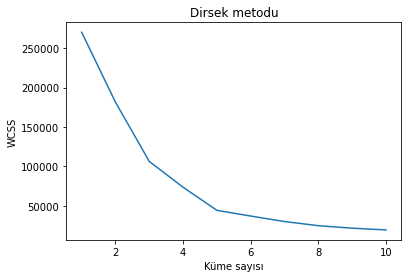

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Dirsek metodu')
plt.xlabel('Küme sayısı')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [10]:
test = kmeans.predict([[15, #Annual Income(k$),
                        39, #Spending Score (1-100)
                       ]])
print("Bu nokta", test[0], "numaralı kümeye aittir")

Bu nokta 2 numaralı kümeye aittir


In [11]:
X[y_kmeans == 0].head()

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42


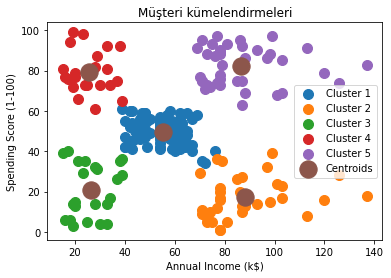

In [12]:
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.title("Müşteri kümelendirmeleri")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [13]:
#Örnek-2

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [15]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

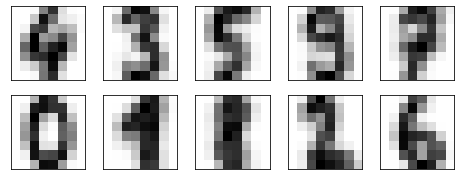

In [16]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

In [17]:
#Hierarchical Clustering, -Agglomerative, -Divisive

In [18]:
customer_data = pd.read_csv('mydata/Mall_Customers.csv')
customer_data.shape

(200, 5)

In [22]:
data = customer_data.iloc[:, 3:5].values

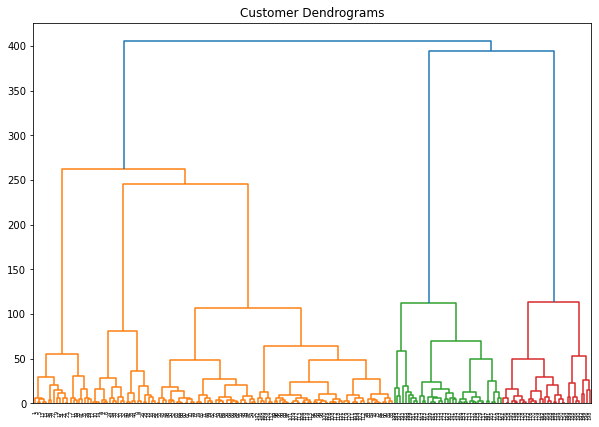

In [23]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [24]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

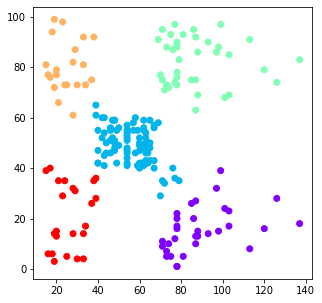

In [25]:
plt.figure(figsize = (5,5))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')

In [26]:
#Örnek-2

In [28]:
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('mydata/pima-indians-diabetes.csv', names = headernames)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
patient_data = data.iloc[:, 3:5].values

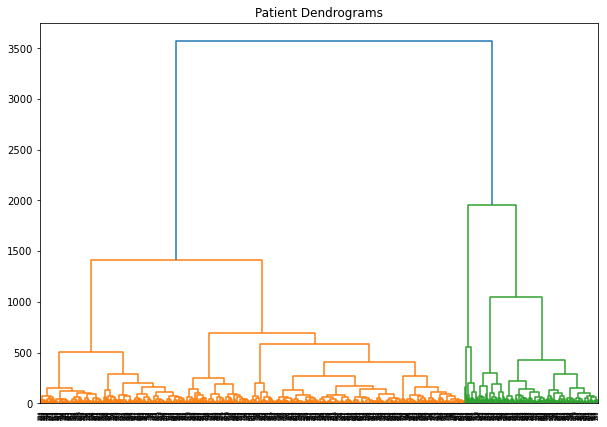

In [31]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title('Patient Dendrograms')
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

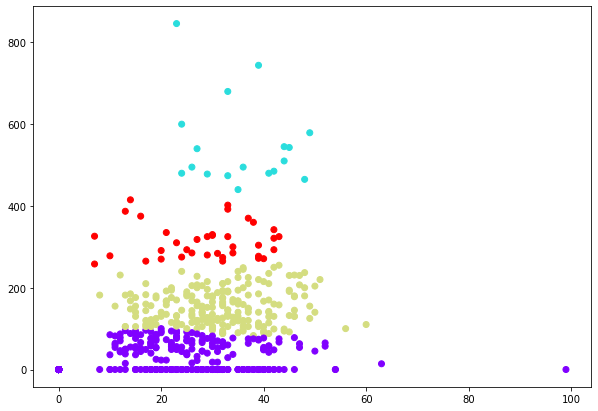

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(patient_data)
plt.figure(figsize = (10,7))
plt.scatter(patient_data[:, 0], patient_data[:, 1], c = cluster.labels_, cmap = 'rainbow')

In [33]:
#Random Forest (Rastgele Orman) Algoritması

In [34]:
#1 - Verisetinden rastgele örnekler seçilerek başlanır.
#2 - Algoritma, her bir örnek için bir karar ağacı oluşturur. Daha sonra herbiri için bir tahmin (pred)
#üretir
#3 - Her tahmin için bir oylama gerçekleştirilir.
#4 - Son olarak, final tahmini en çok oy alan tahmin sonucu olarak belirlenir. 

In [35]:
dataset = pd.read_csv('mydata/Iris.csv')
dataset.head()

,sepal-length,sepal-length,petal-length,petal-width,Class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report :")
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix : 
[[14  0  0]
 [ 0 13  2]
 [ 0  2 14]]
Classification Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.87      0.87      0.87        15
 Iris-virginica       0.88      0.88      0.88        16

       accuracy                           0.91        45
      macro avg       0.91      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45

Accuracy: 0.9111111111111111
